In [1]:
import pandas as pd
import numpy as np

In [2]:
import sqlite3

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### This dataset is downloaded from Kaggle - Iris

In [30]:
conn = sqlite3.connect('C:\\Users\\shubh\\Downloads\\sqlite_practice\\database.sqlite')

In [5]:
cursor = conn.cursor()

In [6]:
cursor.execute('SELECT * FROM sqlite_master').fetchall()

[('table',
  'Iris',
  'Iris',
  2,
  'CREATE TABLE Iris (\n    Id INTEGER PRIMARY KEY,\n    SepalLengthCm NUMERIC,\n    SepalWidthCm NUMERIC,\n    PetalLengthCm NUMERIC,\n    PetalWidthCm NUMERIC,\n    Species TEXT)')]

In [7]:
#cursor.fetchall()

In [8]:
data = pd.read_sql('Select * from Iris', conn)

In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [21]:
data.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


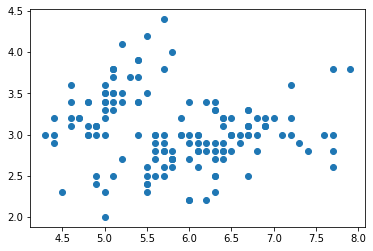

In [12]:
plt.scatter(data.SepalLengthCm, data.SepalWidthCm);

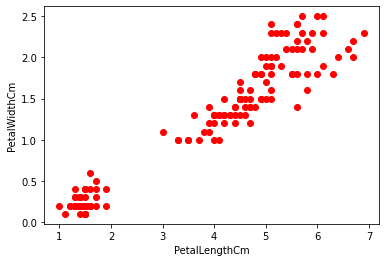

In [20]:
plt.scatter(x = data.PetalLengthCm, y = data.PetalWidthCm, c= 'r');
plt.xlabel('PetalLengthCm');
plt.ylabel('PetalWidthCm');
#plt.legend();

In [23]:
del data['Id']

In [26]:
corelation = data.corr()

In [27]:
mask = np.triu(corelation)

<AxesSubplot:>

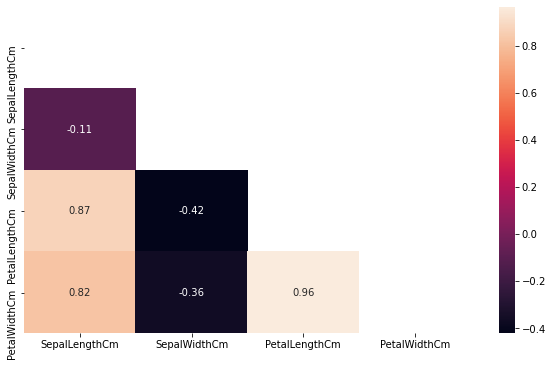

In [29]:
plt.figure(figsize = (10,6))
sns.heatmap(corelation, mask=mask, annot=True)